# CO Radex grid visualizations

December 14, 2023

Test out visualizations using the Radex grid I ran for the CO lines.

Since this is pretty similar in theory to the PDR Toolbox, I can use some of their vizualizations.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u

import os
import cmocean

In [6]:
# Load the model grids
misc_data_path = "/home/ramsey/Documents/Research/Feedback/misc_data/co_grids"
grid_fn = "co_radex_grid_Tk30.0K_size0864.fits"
grid_full_fn = os.path.join(misc_data_path, grid_fn)
extname_key = 'EXTNAME'
grid_dict = {}
with fits.open(grid_full_fn) as hdul:
    for i, hdu in enumerate(hdul):
        if i == 0:
            assert extname_key not in hdu.header
        else:
            extname = hdu.header[extname_key]
            # print(i, extname)
            grid_dict[extname] = hdu.data * u.Unit(hdu.header['BUNIT'])

The extensions and their indices as of December 14, 2023 are:

In [32]:
# Figure out the plot extent stuff once and reuse it, it doesn't change
# Copied the basic code from `co_column_grid.ipynb`

# Extract the 1D indepedent arrays
cd_arr = grid_dict['NH2'][:, 0].to_value()
n_arr = grid_dict['n'][0, :].to_value()

def calc_extent(arr):
    diff = np.diff(arr)[0]
    tmp_arr = arr - diff/2
    return [tmp_arr[0], tmp_arr[-1]+diff]

# Extent array is (low x, high x, low y, high y), which is equivalent to (left right bottom top)
# xaxis is n_arr, yaxis is cd_arr, and log10 them both since grids are log spaced.
extent = calc_extent(np.log10(n_arr)) + calc_extent(np.log10(cd_arr))
# Just throw that into a "plot_kwargs" dict that also has origin='lower' so we can stop writing it so much
plot_kwargs = {'origin': 'lower', 'extent': extent,}

# Make a common plot configurer
def config_ax(ax):
    ax.set_xlabel("n [cm-3]")
    ax.set_ylabel("N(H2) [cm-2]")

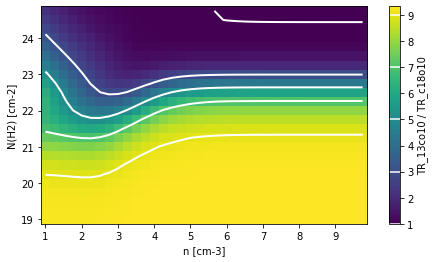

In [61]:
plt.figure(figsize=(8, 4))
lr = (grid_dict['TR_13co10'] / grid_dict['TR_c18o10']).to_value()
plt.imshow(lr, **plot_kwargs, cmap='viridis')
cbar = plt.colorbar(label='TR_13co10 / TR_c18o10')
levels = [1, 3, 5, 7, 9]
plt.contour(lr, levels=levels, colors='white', linewidths=2, **plot_kwargs)
for l in levels:
    cbar.ax.axhline(l, color='white')
config_ax(plt.gca())

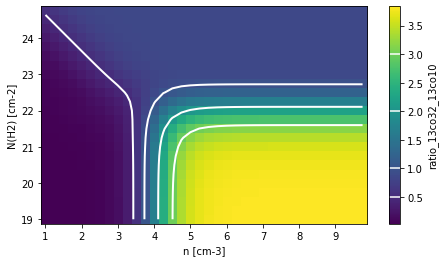

In [62]:
plt.figure(figsize=(8, 4))
lr = (grid_dict['ratio_13co32_13co10']).to_value()
plt.imshow(lr, **plot_kwargs, cmap='viridis')
cbar = plt.colorbar(label='ratio_13co32_13co10')
levels = [0.5, 1, 2, 3]
plt.contour(lr, levels=levels, colors='white', linewidths=2, **plot_kwargs)
for l in levels:
    cbar.ax.axhline(l, color='white')
config_ax(plt.gca())

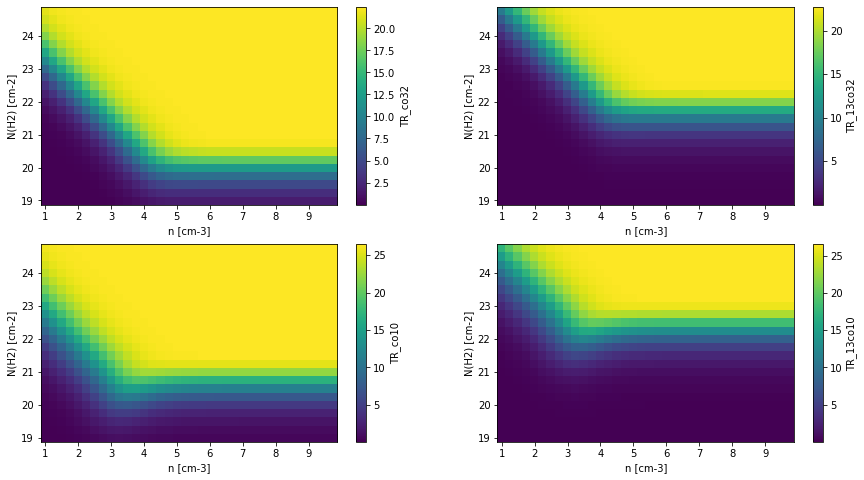

In [63]:
plt.figure(figsize=(15, 8))
plt.subplot(221)
lr = (grid_dict['TR_co32']).to_value()
plt.imshow(lr, **plot_kwargs, cmap='viridis')
cbar = plt.colorbar(label='TR_co32')
# levels = [0.5, 1, 2, 3]
# plt.contour(lr, levels=levels, colors='white', linewidths=2, **plot_kwargs)
# for l in levels:
#     cbar.ax.axhline(l, color='white')
config_ax(plt.gca())

plt.subplot(222)
lr = (grid_dict['TR_13co32']).to_value()
plt.imshow(lr, **plot_kwargs, cmap='viridis')
cbar = plt.colorbar(label='TR_13co32')
# levels = [0.5, 1, 2, 3]
# plt.contour(lr, levels=levels, colors='white', linewidths=2, **plot_kwargs)
# for l in levels:
#     cbar.ax.axhline(l, color='white')
config_ax(plt.gca())

plt.subplot(223)
lr = (grid_dict['TR_co10']).to_value()
plt.imshow(lr, **plot_kwargs, cmap='viridis')
cbar = plt.colorbar(label='TR_co10')
# levels = [0.5, 1, 2, 3]
# plt.contour(lr, levels=levels, colors='white', linewidths=2, **plot_kwargs)
# for l in levels:
#     cbar.ax.axhline(l, color='white')
config_ax(plt.gca())

plt.subplot(224)
lr = (grid_dict['TR_13co10']).to_value()
plt.imshow(lr, **plot_kwargs, cmap='viridis')
cbar = plt.colorbar(label='TR_13co10')
# levels = [0.5, 1, 2, 3]
# plt.contour(lr, levels=levels, colors='white', linewidths=2, **plot_kwargs)
# for l in levels:
#     cbar.ax.axhline(l, color='white')
config_ax(plt.gca())

Try using the scatter plot style. Need to draw contours at each decade of N(H2) and n.

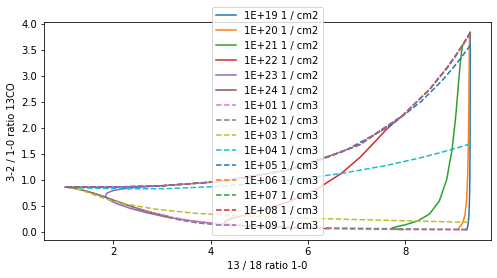

In [71]:
plt.figure(figsize=(8, 4))

# Let x be the 13 to 18 ratio of 1-0
# Let y be the 3-2/1-0 ratio of 13CO

xgrid = (grid_dict['TR_13co10'] / grid_dict['TR_c18o10']).to_value()
ygrid = (grid_dict['ratio_13co32_13co10']).to_value()

# Plot contours which are lines of constant N(H2)
for i in range(0, lr.shape[0], 4):
    # const nh2
    x = xgrid[i, :]
    y = ygrid[i, :]
    plt.plot(x, y, linestyle='-', label=f"{grid_dict['NH2'][i, 0]:.0E}")

for j in range(0, lr.shape[1], 4):
    # const n
    x = xgrid[:, j]
    y = ygrid[:, j]
    plt.plot(x, y, linestyle='--', label=f"{grid_dict['n'][0, j]:.0E}")

plt.xlabel("13 / 18 ratio 1-0")
plt.ylabel("3-2 / 1-0 ratio 13CO")

# plt.legend()


# plt.imshow(lr, **plot_kwargs, cmap='viridis')
# cbar = plt.colorbar(label='TR_13co10 / TR_c18o10')
# levels = [1, 3, 5, 7, 9]
# plt.contour(lr, levels=levels, colors='white', linewidths=2, **plot_kwargs)
# for l in levels:
#     cbar.ax.axhline(l, color='white')
# config_ax(plt.gca())

That looks cool, let me add data to that.

In [73]:
from astropy.wcs import WCS
from reproject import reproject_interp

In [98]:
# 32/10 is used as the y axis
apex_path = "/home/ramsey/Documents/Research/Feedback/m16_data/apex"
co_32_10_ratio_fn = "ratio_v2_13co_32_to_10_pmo_11.0.21.0.fits"

# 13/18 is used as the x axis
pmo_path = "/home/ramsey/Documents/Research/Feedback/m16_data/purplemountain"
co_13_18_ratio_fn = "ratio_13co_to_c18o_10_pmo_11.0.21.0.fits"

fns = {
    'xratio': os.path.join(pmo_path, co_13_18_ratio_fn),
    'yratio': os.path.join(apex_path, co_32_10_ratio_fn)
}

data = {}

for k in fns:
    fn = fns[k]
    print(k, '\n', fn)
    with fits.open(fn) as hdul:
        for i, hdu in enumerate(hdul):
            if i > 0:
                print(i, hdu.header[extname_key])
    print()

xratio 
 /home/ramsey/Documents/Research/Feedback/m16_data/purplemountain/ratio_13co_to_c18o_10_pmo_11.0.21.0.fits
1 ratio_13_to_18
2 err_ratio_13_to_18
3 peak_13co10
4 peak_c18o10

yratio 
 /home/ramsey/Documents/Research/Feedback/m16_data/apex/ratio_v2_13co_32_to_10_pmo_11.0.21.0.fits
1 ratio_32_to_10
2 err_ratio_32_to_10
3 peak_10
4 peak_32



In [99]:
nsigma_cutoff = 3

# First work on 13 to 18, the x axis ratio
with fits.open(fns['xratio']) as hdul:
    xratio = hdul[1].data
    d0 = hdul[3].data # 13co10; 0.2 err
    d1 = hdul[4].data # c18o10; 0.202 err
    mask0 = d0 > 0.2*nsigma_cutoff
    mask1 = d1 > 0.202*nsigma_cutoff
    xmask = mask0 & mask1

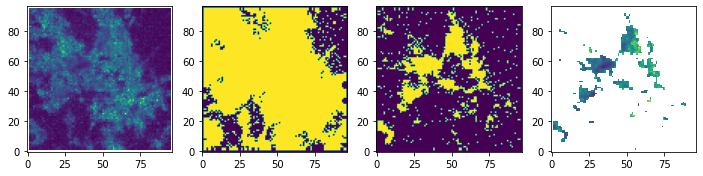

In [100]:
plt.figure(figsize=(12, 5))
plt.subplot(141)
plt.imshow(xratio, origin='lower')
plt.subplot(142)
plt.imshow(mask0, origin='lower')
plt.subplot(143)
plt.imshow(mask1, origin='lower')
tmp = xratio.copy()
tmp[~xmask] = np.nan
plt.subplot(144)
plt.imshow(tmp, origin='lower')

9409
(1762,)


(array([ 55.,  42.,  49.,  88., 166., 235., 278., 241., 206., 160., 111.,
         70.,  30.,  20.,   4.,   7.]),
 array([ 0.74291801,  1.45381784,  2.16471767,  2.8756175 ,  3.58651733,
         4.29741716,  5.00831699,  5.71921682,  6.43011665,  7.14101648,
         7.85191631,  8.56281662,  9.27371597,  9.98461533, 10.69551563,
        11.40641594, 12.11731529]),
 <BarContainer object of 16 artists>)

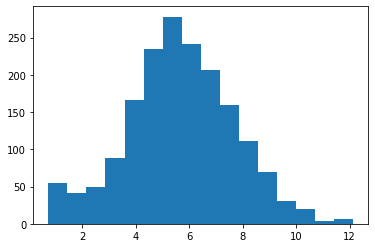

In [101]:
xratio_masked = xratio[xmask].ravel()
print(xratio.size)
print(xratio_masked.shape)

plt.hist(xratio_masked, bins=16)

In [102]:
# yratio, the 32/10
with fits.open(fns['yratio']) as hdul:
    yratio = hdul[1].data
    d0 = hdul[4].data # 13co32; 0.09 err
    d1 = hdul[3].data # 13co10; 0.2 err
    mask0 = d0 > 0.09*nsigma_cutoff
    mask1 = d1 > 0.2*nsigma_cutoff
    ymask = mask0 & mask1

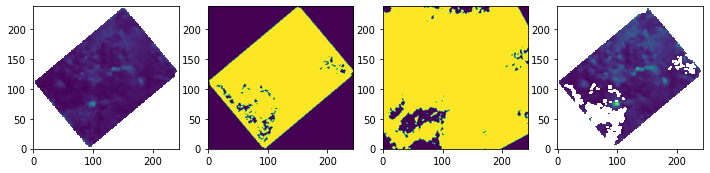

In [103]:
plt.figure(figsize=(12, 5))
plt.subplot(141)
plt.imshow(yratio, origin='lower')
plt.subplot(142)
plt.imshow(mask0, origin='lower')
plt.subplot(143)
plt.imshow(mask1, origin='lower')
tmp = yratio.copy()
tmp[~ymask] = np.nan
plt.subplot(144)
plt.imshow(tmp, origin='lower')

58316
(27020,)


(array([3.993e+03, 9.746e+03, 6.152e+03, 3.517e+03, 2.009e+03, 8.030e+02,
        3.180e+02, 1.620e+02, 1.260e+02, 7.100e+01, 3.600e+01, 2.500e+01,
        1.500e+01, 1.400e+01, 1.300e+01, 6.000e+00, 6.000e+00, 6.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.10052127, 0.28121069, 0.46190012, 0.64258955, 0.82327897,
        1.0039684 , 1.18465783, 1.36534726, 1.54603668, 1.72672611,
        1.90741554, 2.08810496, 2.26879439, 2.44948382, 2.63017324,
        2.81086267, 2.9915521 , 3.17224153, 3.35293095, 3.53362038,
        3.71430981]),
 <BarContainer object of 20 artists>)

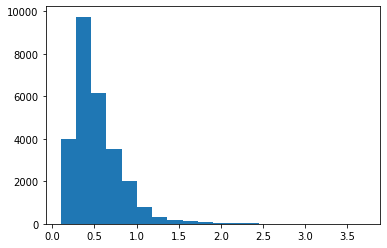

In [105]:
yratio_masked = yratio[ymask].ravel()
print(yratio.size)
print(yratio_masked.shape)

plt.hist(yratio_masked, bins=20)